<a href="https://colab.research.google.com/github/AnastasiiaPashkevych/diabetes-dataset-data-analysis/blob/main/Diabetes_Dataset_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import piplite
# await piplite.install(['seaborn', 'lxml', 'openpyxl'])

# import pandas as pd

# from pyodide.http import pyfetch
!pip install seaborn lxml openpyxl
import pandas as pd
import seaborn as sns
import lxml
import openpyxl


In [13]:
# filename = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/data/diabetes.csv"

# async def download(url, filename):
#     response = await pyfetch(url)
#     if response.status == 200:
#         with open(filename, "wb") as f:
#             f.write(await response.bytes())

# await download(filename, "diabetes.csv")
# df = pd.read_csv("diabetes.csv")

import requests

# URL of the CSV file
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/data/diabetes.csv"  # Replace with the actual URL

# Download the file
response = requests.get(url)

# Save the file locally
with open("diabetes.csv", "wb") as f:
    f.write(response.content)

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv("diabetes.csv")

# Display the first few rows
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
# show the first 5 rows using dataframe.head() method
print("The first 5 rows of the dataframe")
df.head(5)

The first 5 rows of the dataframe


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
# To view the dimensions of the dataframe, we use the .shape parameter.
df.shape

(768, 9)

In [16]:
# This method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [17]:
# Identify and handle missing values
missing_data = df.isnull()
missing_data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False


In [18]:
# Count missing values in each column¶
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

Pregnancies
Pregnancies
False    768
Name: count, dtype: int64

Glucose
Glucose
False    768
Name: count, dtype: int64

BloodPressure
BloodPressure
False    768
Name: count, dtype: int64

SkinThickness
SkinThickness
False    768
Name: count, dtype: int64

Insulin
Insulin
False    768
Name: count, dtype: int64

BMI
BMI
False    768
Name: count, dtype: int64

DiabetesPedigreeFunction
DiabetesPedigreeFunction
False    768
Name: count, dtype: int64

Age
Age
False    768
Name: count, dtype: int64

Outcome
Outcome
False    768
Name: count, dtype: int64



In [19]:
# Correct data format
df.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


In [20]:
# import libraries
import matplotlib.pyplot as plt
import seaborn as sns

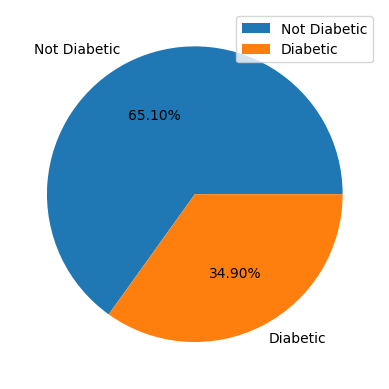

In [21]:
labels= 'Not Diabetic','Diabetic'
plt.pie(df['Outcome'].value_counts(),labels=labels,autopct='%0.02f%%')
plt.legend()
plt.show()